In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D  # convolution Layer
from keras.layers import MaxPooling2D   # Pooling Layer
from keras.layers import Flatten        # Flatten
from keras.layers import Dense  
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Hidden Layer & Output Layer
import keras
from keras import layers


import warnings 
warnings.filterwarnings("ignore")

In [4]:
# Fitting the CNN to the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(rescale = 1./255)  # max normilization
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32                                   
train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)
#test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r"C:\Users\ASHISH PAL\Downloads\DL + AI Exam Paper\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\train",
                                                 target_size=(IMG_WIDTH, IMG_HEIGHT), # HEIGHT AND WIDTH
                                                 subset= 'training',
                                                 batch_size = 100, # take 32 group which pick image randomly without replacement
                                                 class_mode = 'categorical')
test_set = train_datagen.flow_from_directory(r"C:\Users\ASHISH PAL\Downloads\DL + AI Exam Paper\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\train",
                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                             batch_size = 15,
                                             class_mode = 'categorical',
                                             subset='validation')

Found 585 images belonging to 3 classes.
Found 193 images belonging to 3 classes.


In [5]:
training_set.class_indices

{'Boots': 0, 'Sandals': 1, 'Slippers': 2}

In [6]:
labels = {value: key for key, value in training_set.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Boots
1 : Sandals
2 : Slippers


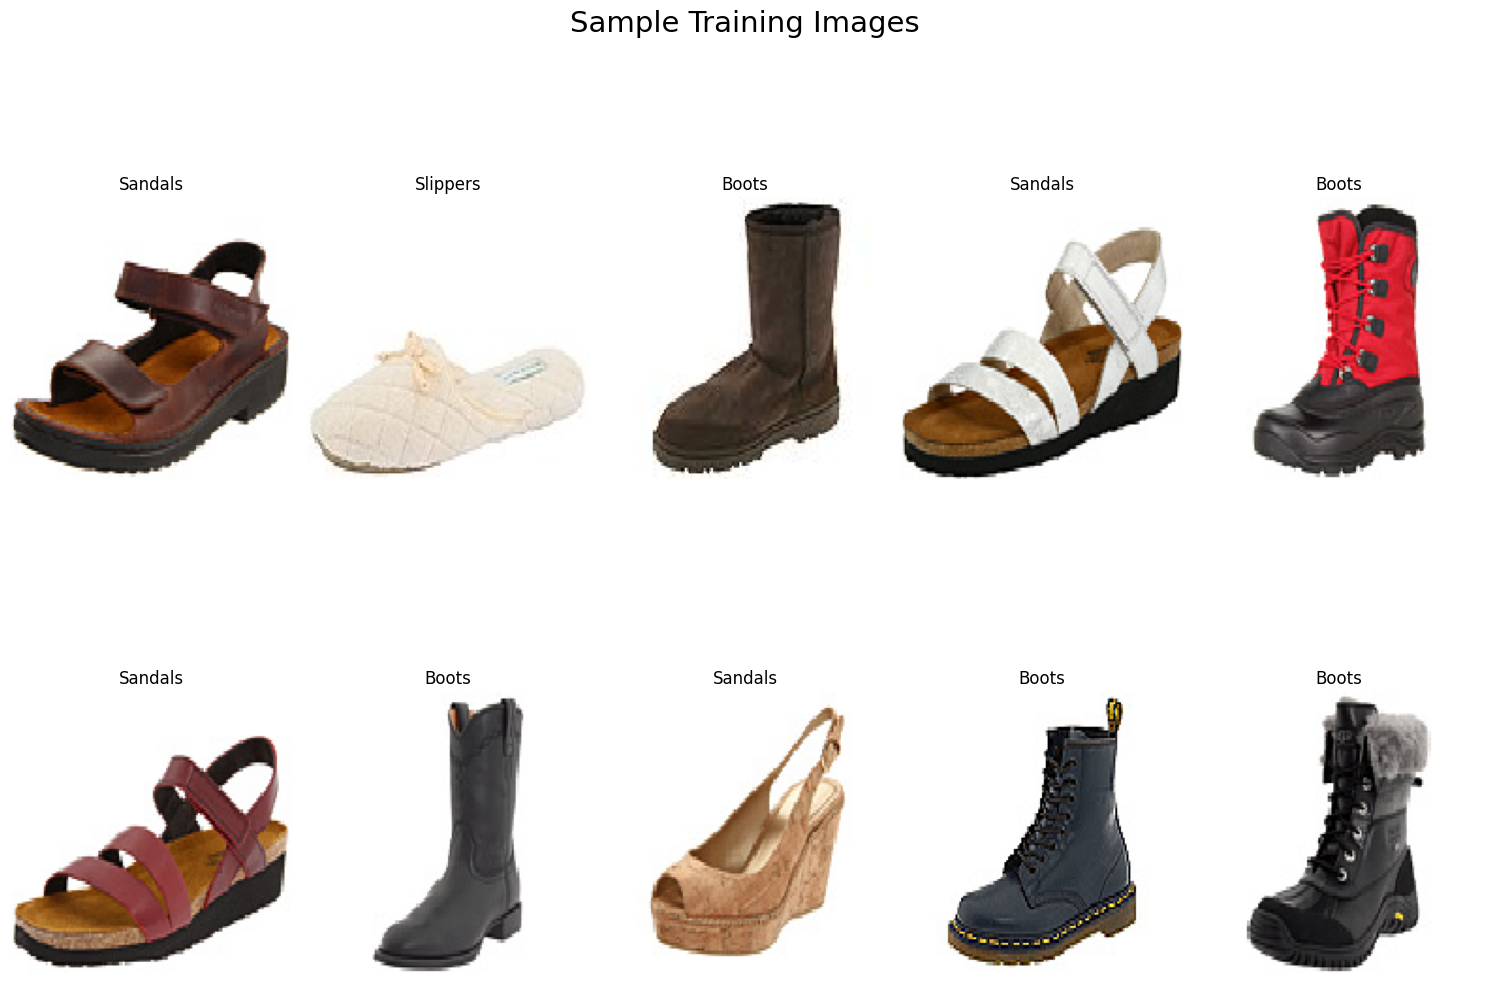

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(training_set[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(training_set[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [8]:
for image_batch, labels_batch in training_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(100, 150, 150, 3)
(100, 3)


# Training a CNN Model

In [9]:
# Initialising the CNN
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)

model=tf.keras.models.Sequential()
model.add(layers.Conv2D(16,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [10]:
# Compiling the CNN
epochs = 12 # awalnya 20

tf.random.set_seed(1)
model.build()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 524,195 (2.00 MB)

 Trainable params: 524,195 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
result = model.fit(training_set,
                   validation_data=test_set, 
                   epochs=10)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 875ms/step - accuracy: 0.4509 - loss: 1.0409 - val_accuracy: 0.4197 - val_loss: 0.9913
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 510ms/step - accuracy: 0.5710 - loss: 0.8571 - val_accuracy: 0.7927 - val_loss: 0.6693
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 463ms/step - accuracy: 0.7488 - loss: 0.5397 - val_accuracy: 0.9067 - val_loss: 0.3786
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 469ms/step - accuracy: 0.8110 - loss: 0.4259 - val_accuracy: 0.7927 - val_loss: 0.4770
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 514ms/step - accuracy: 0.8461 - loss: 0.3944 - val_accuracy: 0.8549 - val_loss: 0.4040
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 465ms/step - accuracy: 0.8396 - loss: 0.3693 - val_accuracy: 0.8860 - val_loss: 0.3632
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 454ms/step - accuracy: 0.8872 - loss: 0.3063 - val_accuracy: 0.9171 - val_loss: 0.2874
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 471ms/step - accuracy: 0.8608 - loss: 0.3040 - val_accuracy: 0.9223 - val_loss

In [23]:
model.save('shoe_classifier.h5')

In [20]:
!pip install keras-preprocessing
!pip install opencv-python

   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   --------- ------------------------------ 10.2/42.6 kB ? eta -:--:--
   ------------------- -------------------- 20.5/42.6 kB 640.0 kB/s eta 0:00:01
   ---------------------------- ----------- 30.7/42.6 kB 435.7 kB/s eta 0:00:01
   ---------------------------------------- 42.6/42.6 kB 294.0 kB/s eta 0:00:00


In [21]:
from keras.models import load_model
from keras_preprocessing import image
import numpy as np
import cv2   
import matplotlib.pyplot as plt 
%matplotlib inline

In [24]:
new_model = load_model("shoe_classifier.h5")

In [25]:
from PIL import Image
def model_output(dir_addr):
    my_img = image.load_img(dir_addr, target_size=(150,150))
    plt.imshow(my_img)
    plt.show()

    my_img = image.img_to_array(my_img)
    my_img = np.expand_dims(my_img, axis= 0)

    reverse_mapping = dict(zip([0, 1, 2], ['Boot', 'Sandal', 'Slippers']))

    def mapper(val):
        return reverse_mapping[val]

    pred = new_model.predict(my_img)
    value = np.argmax(pred)
    shoe_name = mapper(value)
    print("Prediction is {}.".format(shoe_name))

    print(str(pred)+'\n')

In [26]:
import os 
os.chdir(r"C:\Users\ASHISH PAL\Downloads\DL + AI Exam Paper\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\test")

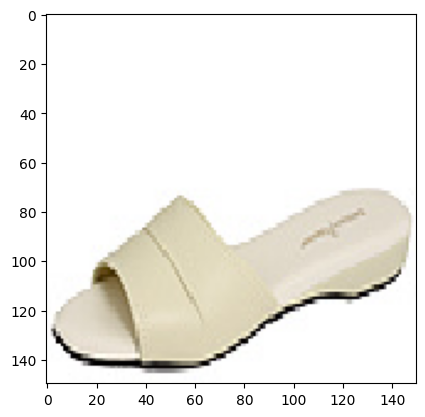

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Prediction is Slippers.
[[0.000000e+00 9.705466e-09 1.000000e+00]]



In [27]:
model_output(r"C:\Users\ASHISH PAL\Downloads\DL + AI Exam Paper\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\test\image (9).jpg")

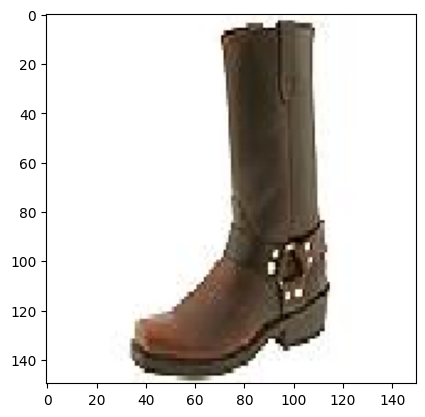

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction is Boot.
[[1. 0. 0.]]



In [29]:
model_output(r"C:\Users\ASHISH PAL\Downloads\DL + AI Exam Paper\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\test\image (33).jpg")

# Accuracy of Model

In [30]:
score = model.evaluate(training_set,verbose=0)
print("Accuracy and loss of model")
print('Train Loss : {:.4f}'.format(score[0]))
print('Train Accuracy : {:.4f}'.format(score[1]))

Accuracy and loss of model
Train Loss : 0.2578
Train Accuracy : 0.9094
